**Problem Statement**

In this part, we will predict medical cost personal insurance. Dataset ingest from [here](https://www.kaggle.com/mirichoi0218/insurance) where included:
1. age : age of primary beneficiary
2. sex : insurance contractor gender, female, male
3. bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children : Number of children covered by health insurance / Number of dependents
5. smoker : Smoking
6. region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges : Individual medical costs billed by health insurance

In [1]:
# import useful library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm, boxcox
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [6]:
# import dataset
!unzip "/content/med-insurance.zip"

Archive:  /content/med-insurance.zip
 extracting: med-insurance.csv       


In [7]:
df = pd.read_csv("med-insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
print("Shape of dataframe:", df.shape)

Shape of dataframe: (1338, 7)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## **EXPLORATION**

In [11]:
df[["sex", "expenses"]]\
.groupby(["sex"], as_index=False).mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,sex,expenses
1,male,13956.751420
0,female,12569.578897


In [13]:
df[["children", "expenses"]]\
.groupby(["children"], as_index=False).mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,children,expenses
3,3,15355.318535
2,2,15073.564000
4,4,13850.656800
1,1,12731.171821
0,0,12365.975767
5,5,8786.035556


In [14]:
df[["smoker", "expenses"]]\
.groupby(["smoker"], as_index=False).mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,smoker,expenses
1,yes,32050.231971
0,no,8434.268449


In [15]:
df[["region", "expenses"]]\
.groupby(["region"], as_index=False).mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,region,expenses
2,southeast,14735.411538
0,northeast,13406.384691
1,northwest,12417.575169
3,southwest,12346.937908


In [17]:
df.groupby(["region"], as_index=False)['age', 'bmi', 'children', 'expenses'].mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,region,age,bmi,children,expenses
2,southeast,38.939560,33.359341,1.049451,14735.411538
0,northeast,39.268519,29.176235,1.046296,13406.384691
1,northwest,39.196923,29.201846,1.147692,12417.575169
3,southwest,39.455385,30.596615,1.141538,12346.937908


In [18]:
df.groupby(["sex"], as_index=False)['age', 'bmi', 'children', 'expenses'].mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,sex,age,bmi,children,expenses
1,male,38.917160,30.945266,1.115385,13956.751420
0,female,39.503021,30.379758,1.074018,12569.578897


In [19]:
df.groupby(["smoker"], as_index=False)['age', 'bmi', 'children', 'expenses'].mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,smoker,age,bmi,children,expenses
1,yes,38.514599,30.713139,1.113139,32050.231971
0,no,39.385338,30.653195,1.090226,8434.268449


In [20]:
df.groupby(["children"], as_index=False)['age', 'bmi', 'expenses'].mean()\
.sort_values(by = "expenses",ascending = False)\
.style.background_gradient("Greens")

,children,age,bmi,expenses
3,3,41.566879,30.688535,15355.318535
2,2,39.445833,30.979167,15073.564000
4,4,39.000000,31.388000,13850.656800
1,1,39.453704,30.623765,12731.171821
0,0,38.444251,30.553484,12365.975767
5,5,35.611111,29.600000,8786.035556


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


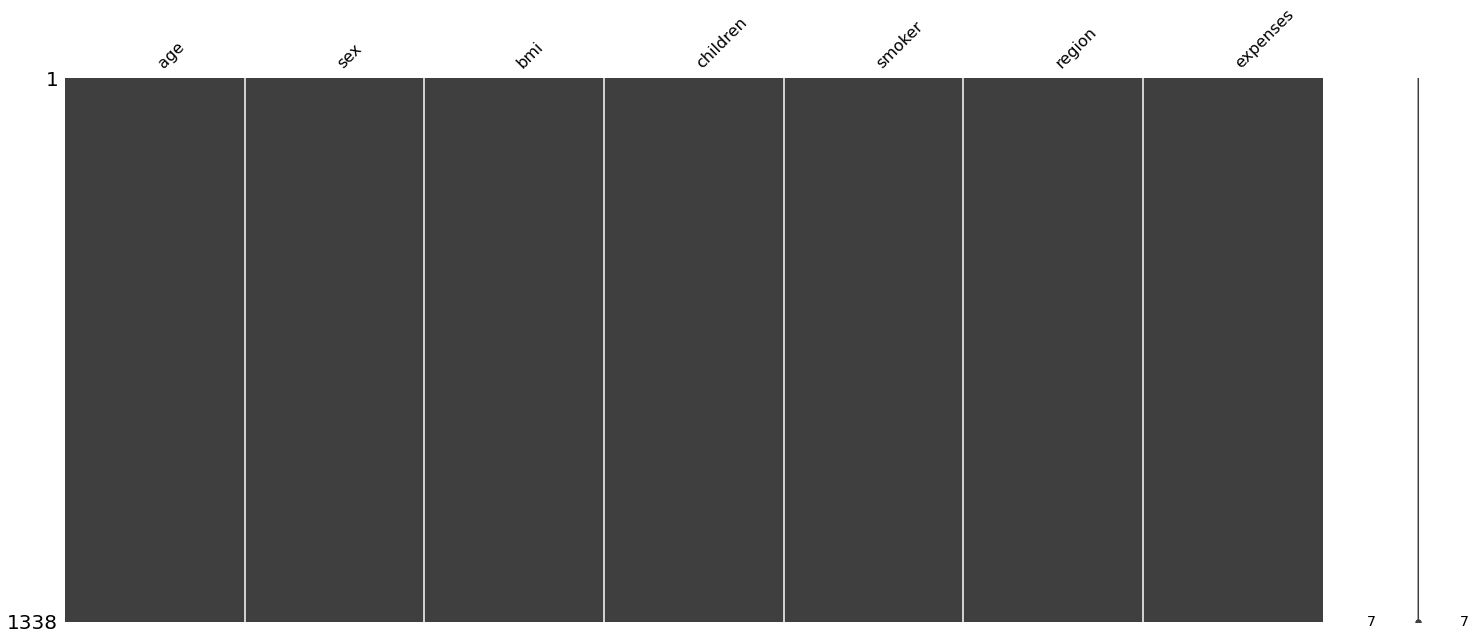

In [23]:
import missingno as msno
%matplotlib inline
msno.matrix(df)
print(df.isnull().sum());

Based on information above, no missing data and we can see distribution of our data.

## **Visualization**

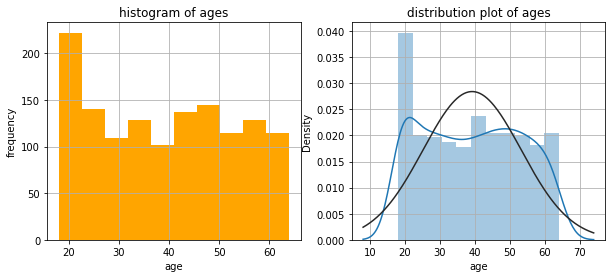

In [29]:
# Univariate visualization
# AGE
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(df['age'], color="orange")
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("histogram of ages")

plt.subplot(1,2,2)
plt.grid()
sns.distplot(df['age'], fit=norm)
plt.title("distribution plot of ages")

plt.show();

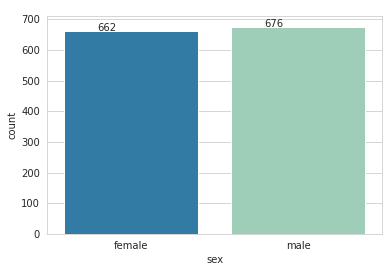

In [34]:
# SEX
sns.set_style("whitegrid")
ax = sns.countplot(x="sex", data=df, palette='YlGnBu_r')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=10)

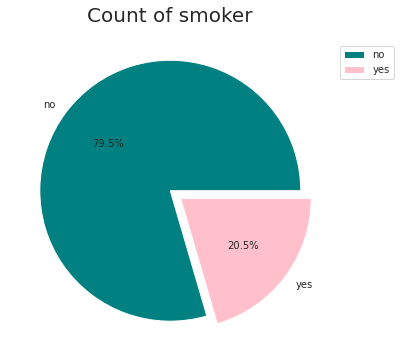

In [42]:
# SMOKER
plt.figure(figsize=(6,6))
plt.pie(df['smoker'].value_counts().values, explode=[0,.1], 
        shadow=False, labels=df['smoker'].value_counts().index,
        colors=['teal','pink'], autopct='%1.1f%%')
plt.title("Count of smoker", fontsize=20)
plt.legend(df['smoker'].value_counts().index, 
           bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.show();

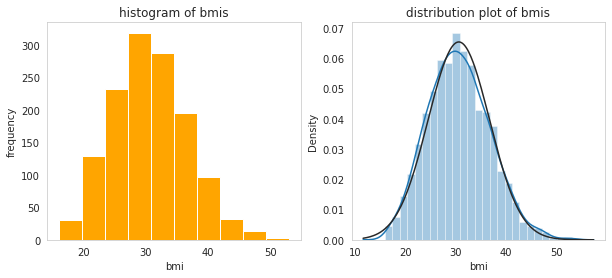

In [43]:
# BMI
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(df['bmi'], color="orange")
plt.xlabel("bmi")
plt.ylabel("frequency")
plt.title("histogram of bmis")

plt.subplot(1,2,2)
plt.grid()
sns.distplot(df['bmi'], fit=norm)
plt.title("distribution plot of bmis")

plt.show();

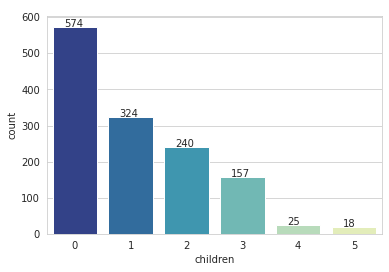

In [44]:
# Children
sns.set_style("whitegrid")
ax = sns.countplot(x="children", data=df, palette='YlGnBu_r')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=10)

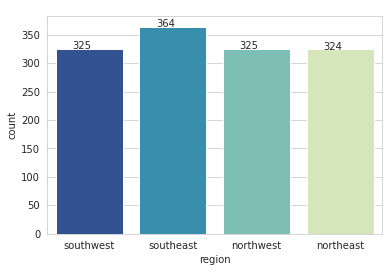

In [45]:
# Region
sns.set_style("whitegrid")
ax = sns.countplot(x="region", data=df, palette='YlGnBu_r')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=10)

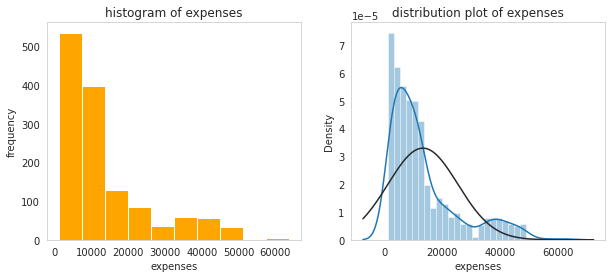

In [46]:
# EXPENSES
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(df['expenses'], color="orange")
plt.xlabel("expenses")
plt.ylabel("frequency")
plt.title("histogram of expenses")

plt.subplot(1,2,2)
plt.grid()
sns.distplot(df['expenses'], fit=norm)
plt.title("distribution plot of expenses")

plt.show();

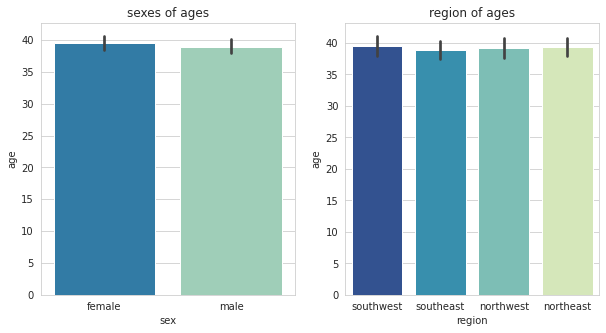

In [68]:
## BIVARIATE
# AGE vs SEX vs Region
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.barplot(x="sex", y="age", data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("sexes of ages")

plt.subplot(1,2,2)
ax = sns.barplot(x="region", y="age", data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("region of ages");

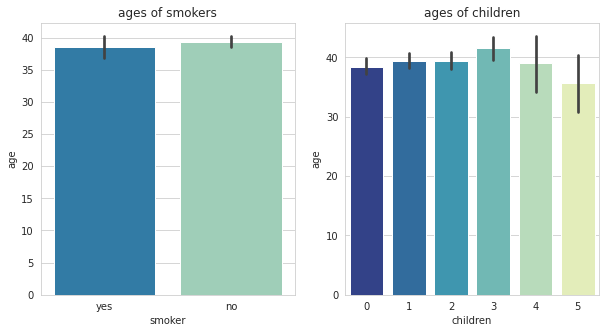

In [67]:
# AGE vs SMOKER vs CHILDREN
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.barplot(x="smoker", y="age", data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("ages of smokers")

plt.subplot(1,2,2)
ax = sns.barplot(x="children", y="age", data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("ages of children");

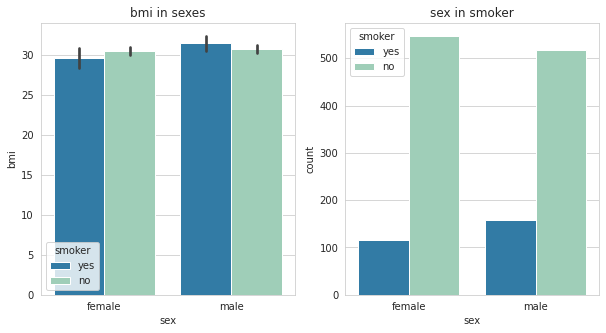

In [69]:
# SEX vs BMI vs SMOKER
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.barplot(x="sex", y="bmi", hue="smoker",data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("bmi in sexes")

plt.subplot(1,2,2)
ax = sns.countplot(x="sex", hue="smoker", data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("sex in smoker");

Based on graph above, we concluded the data show that male has highest smokers in bmi and number of children on no smoker is highest than smoker.

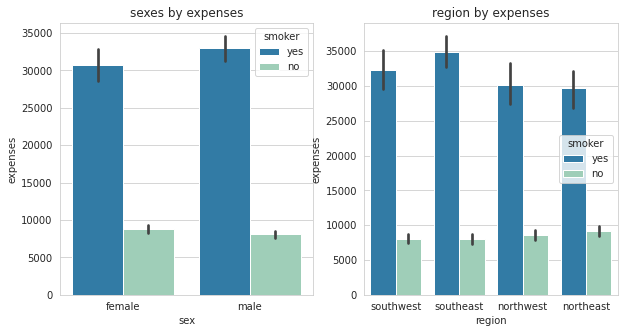

In [70]:
# SEX vs EXPENSES vs REGION
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.barplot(x="sex", y="expenses", hue="smoker",data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("sexes by expenses")

plt.subplot(1,2,2)
ax = sns.barplot(x="region", y="expenses", hue="smoker",data=df, palette='YlGnBu_r')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=6)
plt.title("region by expenses");

In [72]:
# BOXPLOT
px.box(df, x="sex", y="expenses", 
       title="Sexes by expenses",
       points="all")

In [73]:
px.box(df, x="children", y="expenses", 
       title="Children by expenses",
       points="all")

In [74]:
px.box(df, x="smoker", y="expenses", 
       title="Smoker by expenses",
       points="all")

In [77]:
px.scatter(df, x="bmi", y="expenses", 
           title="BMI by expenses")

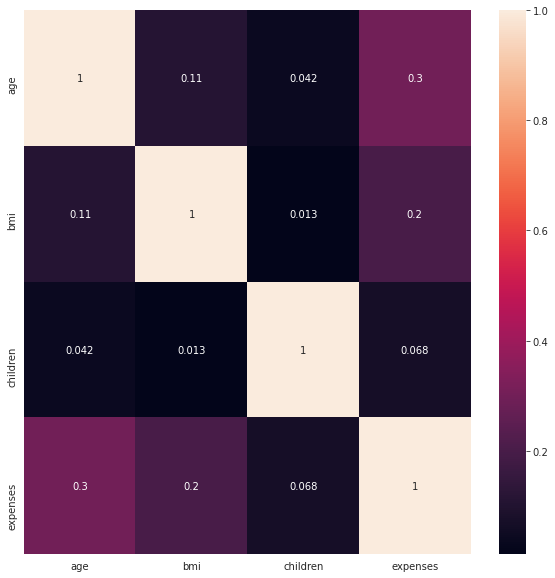

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

# **Modelling STEP**

In [80]:
# change type of data
data = pd.get_dummies(df, columns=['sex'])
data = pd.get_dummies(data, columns=['children'])
data = pd.get_dummies(data, columns=['smoker'])
data = pd.get_dummies(data, columns=['region'])
data['expenses'] = np.log1p(data['expenses'])
data.head()

,age,bmi,expenses,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,9.734235,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.8,7.453880,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.0,8.400763,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.7,9.998137,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.9,8.260457,0,1,1,0,0,0,0,0,1,0,0,1,0,0


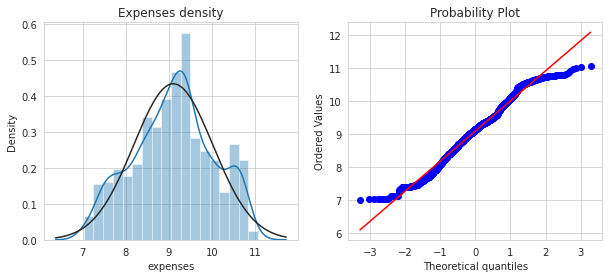

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data['expenses'], fit=norm)
plt.title("Expenses density")
plt.subplot(1,2,2)
stats.probplot(data['expenses'], plot=plt)
plt.show();

In [84]:
# Splitting data
X = data.drop(["expenses"], axis=1)
y = data.expenses
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=11)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)
print("Data is ready!")

X Train: (1070, 16)
X Test: (268, 16)
y Train: (1070,)
y Test: (268,)
Data is ready!


In [85]:
# Build evaluation models
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [86]:
CV = []
R2_train = []
R2_test = []
mae_train=[]
mse_train=[]
mae_test=[]
mse_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Mean Squared error  of train set
    mse_train_model = mean_squared_error(y_train,y_pred_train)
    mse_train.append(round(mse_train_model,2))
    
    # Mean absolute error of train set
    mae_train_model = mean_absolute_error(y_train,y_pred_train)
    mae_train.append(round(mae_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Mean Squared error of test set
    mse_test_model = mean_squared_error(y_test,y_pred_test)
    mse_test.append(round(mse_test_model,2))
    
    # Mean absolute error of train set
    mae_test_model = mean_absolute_error(y_test,y_pred_test)
    mae_test.append(round(mae_test_model,2))
        
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
       
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train Mean absolute error :",round(mae_train_model,2))
    print("Test Mean absolute error :",round(mae_test_model,2))
    print("Train Mean Squared error :",round(mse_train_model,2))
    print("Test Mean Squared error :",round(mse_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.77
Test R2-score : 0.76
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.19
Test Mean Squared error : 0.2
Train CV scores : [0.74374697 0.71346983 0.7949927  0.76726917 0.80885994]
Train CV mean : 0.77


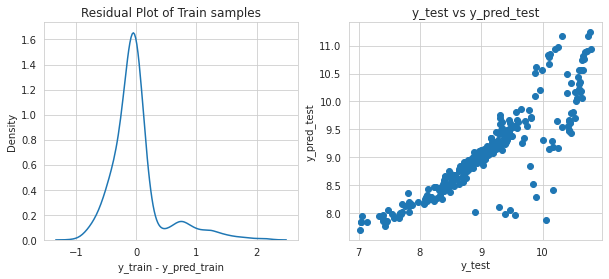

In [87]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.77
Test R2-score : 0.76
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.19
Test Mean Squared error : 0.2
Train CV scores : [0.74407732 0.71569015 0.79572762 0.76812005 0.80753605]
Train CV mean : 0.77


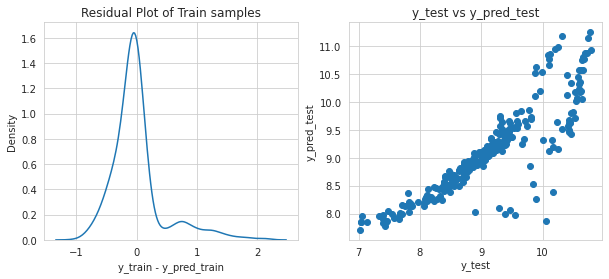

In [88]:
# RIDGE
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.77
Test R2-score : 0.76
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.19
Test Mean Squared error : 0.2
Train CV scores : [0.74399413 0.71532819 0.79536943 0.76644915 0.80795195]
Train CV mean : 0.77


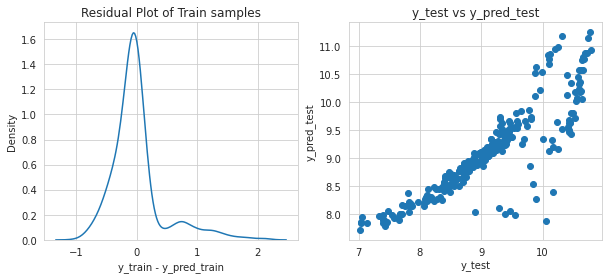

In [89]:
# LASSO
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.88
Test R2-score : 0.81
Train Mean absolute error : 0.17
Test Mean absolute error : 0.2
Train Mean Squared error : 0.1
Test Mean Squared error : 0.15
Train CV scores : [0.76650626 0.79982193 0.87150408 0.85658881 0.85988746]
Train CV mean : 0.83


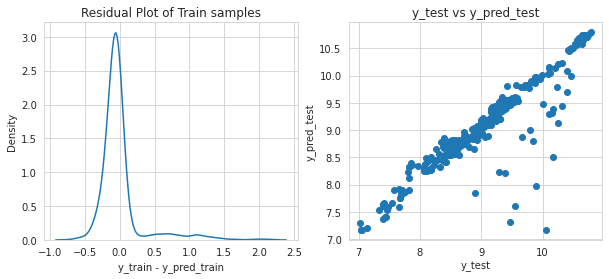

In [90]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

Train R2-score : 0.88
Test R2-score : 0.81
Train Mean absolute error : 0.17
Test Mean absolute error : 0.2
Train Mean Squared error : 0.1
Test Mean Squared error : 0.15
Train CV scores : [0.79055532 0.81305481 0.88337697 0.85884588 0.88128229]
Train CV mean : 0.85


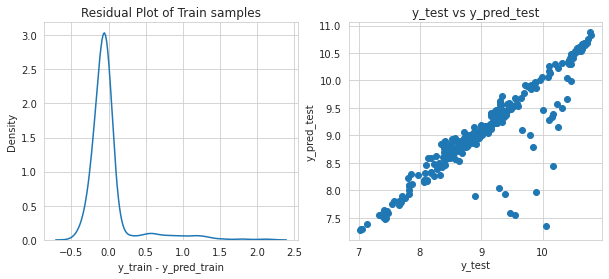

In [91]:
# GRADIENTBOOSTING
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [92]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     "mae_train":mae_train,"mse_train":mse_test,"mae_test":mae_test,"mse_test":mse_test})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),mae_train,mse_train,mae_test,mse_test
0,LinearRegression,0.77,0.76,0.77,0.28,0.20,0.28,0.20
1,Ridge,0.77,0.76,0.77,0.28,0.20,0.28,0.20
2,Lasso,0.77,0.76,0.77,0.28,0.20,0.28,0.20
3,RandomForestRegressor,0.88,0.81,0.83,0.17,0.15,0.20,0.15
4,GradientBoostingRegressor,0.88,0.81,0.85,0.17,0.15,0.20,0.15


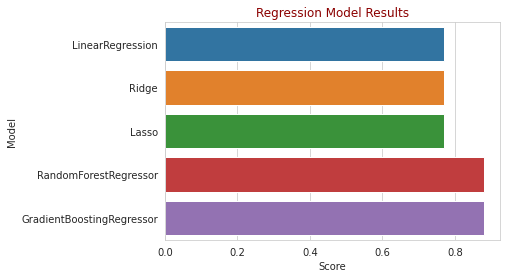

In [93]:
g = sns.barplot(y = results.Model, x =results["R Squared(Train)"])
g.set_xlabel("Score")
g.set_title("Regression Model Results", color = "darkred")
plt.show()